In [1]:
# zaimportuj pakiet tensorflow oraz keras layers z elementami Dense, Flatten i Conv2D 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
print(tf.__version__)

2.10.1


**Sieć neuronowa** klasyfikująca zbiór danych <span style="font-size:14pt;color:red;">MNIST</span>

In [3]:
cena = 580

In [4]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
#normalizacja danych -> x - obraz, y - etykieta 0-9
x_train,x_test = x_train/255.0,x_test/255.0

x_train = x_train[...,tf.newaxis].astype("float32")
x_test = x_test[...,tf.newaxis].astype("float32")

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train,y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test,y_test)).batch(32)

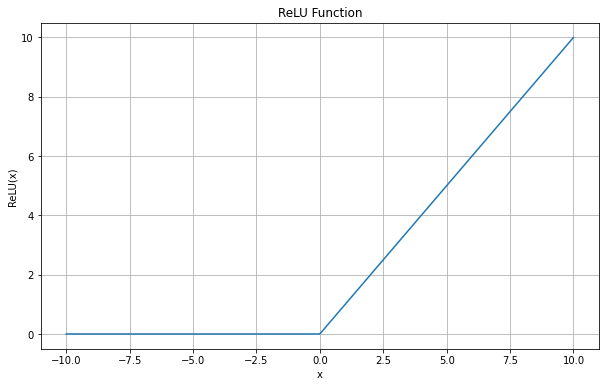

In [6]:
# korzystając z matplotlib wykreśl wykres funkcji relu 
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np

# Generating an array of values from -10 to 10
x_values = np.linspace(-10, 10, 400)

# Applying the ReLU function on the values
y_values = np.maximum(0, x_values)

# Plotting the function
plt.figure(figsize=(10,6))
plt.plot(x_values, y_values)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

In [7]:
#tworzenie modelu sieci

class MyModel(Model):
    # def __new__(cls, *args, **kwargs):
    #     return object.__new__(MyModel)

    def __init__(self):
        super(MyModel,self).__init__()
        self.conv1 = Conv2D(32,3,activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128,activation='relu')
        self.d2 = Dense(10)

    def __repr__(self):
        return "prosta sieć z warstwą konwolucyjną o gęstości 32 i macierzy CONV (3,3)"
    
    def call(self,x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

    
model = MyModel()
print(model)

prosta sieć z warstwą konwolucyjną o gęstości 32 i macierzy CONV (3,3)


In [8]:
#definicja optymalizatora i funkcji strat
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [9]:
#wybór metryk do  parametrów sieci
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [10]:
@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = model(images,training=True)
        loss = loss_object(labels,predictions)
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels,predictions)
    

In [11]:
@tf.function
def test_step(images,labels):
    predictions = model(images,training=False)
    t_loss = loss_object(labels,predictions)
    test_loss(t_loss)
    test_accuracy(labels,predictions)

In [12]:
EPOCHS = 5
for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images,labels in train_ds:
        train_step(images,labels)

    for test_images, test_labels in test_ds:
        test_step(test_images,test_labels)

    print(
        f'Epoka: {epoch+1}\nStrata:{train_loss.result()}\nDokładność:{train_accuracy.result()*100}%\n'
        f'Test strata: {test_loss.result()},\nTest Dokładność: {test_accuracy.result()*100}%'
    )


Epoka: 1
Strata:0.13226193189620972
Dokładność:96.02833557128906%
Test strata: 0.057164717465639114,
Test Dokładność: 98.16999816894531%
Epoka: 2
Strata:0.04141634702682495
Dokładność:98.66999816894531%
Test strata: 0.05419893190264702,
Test Dokładność: 98.1500015258789%
Epoka: 3
Strata:0.021542610600590706
Dokładność:99.29666137695312%
Test strata: 0.058822955936193466,
Test Dokładność: 98.29000091552734%
Epoka: 4
Strata:0.01304850447922945
Dokładność:99.55500030517578%
Test strata: 0.056481000036001205,
Test Dokładność: 98.33999633789062%
Epoka: 5
Strata:0.009543878957629204
Dokładność:99.67500305175781%
Test strata: 0.07353892922401428,
Test Dokładność: 98.1500015258789%
